In [3]:
from utils import *
krx_list = get_KRX_list()
stock_list = [
    "한미사이언스",
    "한미약품",
    "유한양행",
    "SK바이오팜",
    "씨젠",
    "녹십자",
    "셀트리온제약",
    "SK바이오사이언스",
    "알테오젠",
    "삼성바이오로직스",
    "셀트리온헬스케어",
    "셀트리온",
    "에스디바이오센서"
]

# stock Code, Name 추출
df = pd.DataFrame(krx_list)
stock_list = df[df['Name'].isin(stock_list)]
start_date, end_date = '20230101', '20231206'
origin_data = get_dataset(stock_list, start_date, end_date)


/Users/kimjuyoung/anaconda3/envs/sesac/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kimjuyoung/anaconda3/envs/sesac/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


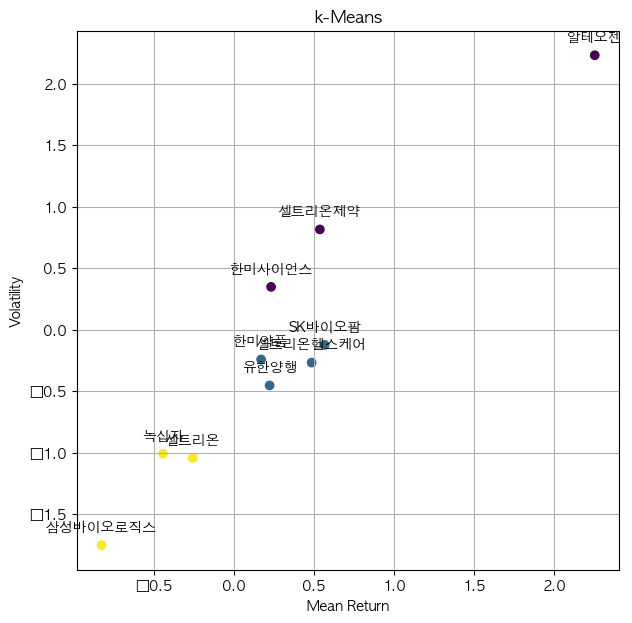

In [4]:
df = filter_data(origin_data.copy())
df = df[['Name', 'Close']] # 종가만 사용
rescaled_dataset = standard_scaler(df)

# cosine cluster
cosine_labels = cosine_kmeans_clustering(rescaled_dataset,5)
cosine_cluster = add_cluster_labels(rescaled_dataset, cosine_labels)
# 소수 클러스터 삭제
cosine_cluster = filter_clusters(cosine_cluster)
# 결과 파일로 저장.
cosine_cluster.to_csv('뉴딜지수.csv')

# 시각화
X = cosine_cluster
import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = 'AppleGothic' # 한글 깨질 경우. 맥
# plt.rcParams["font.family"] = 'Malgun Gothic' # 한글 깨질 경우. 윈도우
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(X.values[:, 0], X.values[:, 1], c=X.values[:, 2], cmap='viridis') # data: pandas
ax.set_title('k-Means')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')

# 각 scatter에 이름 명시
for x, y, name in zip(X.iloc[:,0],X.iloc[:,1],X.index):
    label = name
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
